
## Step 1: Dataset Selection

In this project, I chose the **UCI Heart Disease Dataset**, which is publicly available on [Kaggle](https://www.kaggle.com/datasets/lourenswalters/uci-heart-disease-data-set). The dataset consists of 303 patient records and includes 14 attributes related to various medical conditions such as age, sex, chest pain type, cholesterol levels, resting blood pressure, and the diagnosis of heart disease.

The goal of this project is to analyze factors that may be associated with the presence of heart disease. The dataset includes both numerical and categorical variables, which makes it appropriate for exploratory data analysis and visual investigation.

---

### Why I selected this dataset:

Heart disease is one of the leading causes of death globally. Understanding the patterns in the data and how certain variables affect heart disease risk can be informative and practically useful. The dataset is clean, well-documented, and widely used in classification and medical data analysis examples.

---

### Questions I plan to explore:

1. Is there a relationship between gender and heart disease?
2. How does cholesterol level affect the likelihood of heart disease?
3. Does age influence maximum heart rate, and how does that relate to disease presence?

---

### Load Data (Embedded CSV)

The dataset is embedded directly in the code block below, so no additional upload is needed.


In [ ]:
import pandas as pd
from io import StringIO

# Embedded CSV data
csv_data = """age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0
56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0,0
48.0,1.0,2.0,110.0,229.0,0.0,0.0,168.0,0.0,1.0,3.0,0.0,7.0,1
54.0,1.0,4.0,140.0,239.0,0.0,0.0,160.0,0.0,1.2,1.0,0.0,3.0,0
48.0,0.0,3.0,130.0,275.0,0.0,0.0,139.0,0.0,0.2,1.0,0.0,3.0,0
49.0,1.0,2.0,130.0,266.0,0.0,0.0,171.0,0.0,0.6,1.0,0.0,3.0,0
64.0,1.0,1.0,110.0,211.0,0.0,2.0,144.0,1.0,1.8,2.0,0.0,3.0,0
58.0,0.0,1.0,150.0,283.0,1.0,2.0,162.0,0.0,1.0,1.0,0.0,3.0,0
58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1
58.0,1.0,3.0,132.0,224.0,0.0,2.0,173.0,0.0,3.2,1.0,2.0,7.0,3
60.0,1.0,4.0,130.0,206.0,0.0,2.0,132.0,1.0,2.4,2.0,2.0,7.0,4
50.0,0.0,3.0,120.0,219.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0,0
58.0,0.0,3.0,120.0,340.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0,3.0,0
66.0,0.0,1.0,150.0,226.0,0.0,0.0,114.0,0.0,2.6,3.0,0.0,3.0,0
43.0,1.0,4.0,150.0,247.0,0.0,0.0,171.0,0.0,1.5,1.0,0.0,3.0,0
40.0,1.0,4.0,110.0,167.0,0.0,2.0,114.0,1.0,2.0,2.0,0.0,7.0,3
69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0,0
60.0,1.0,4.0,117.0,230.0,1.0,0.0,160.0,1.0,1.4,1.0,2.0,7.0,2
64.0,1.0,3.0,140.0,335.0,0.0,0.0,158.0,0.0,0.0,1.0,0.0,3.0,1
59.0,1.0,4.0,135.0,234.0,0.0,0.0,161.0,0.0,0.5,2.0,0.0,7.0,0
44.0,1.0,3.0,130.0,233.0,0.0,0.0,179.0,1.0,0.4,1.0,0.0,3.0,0
42.0,1.0,4.0,140.0,226.0,0.0,0.0,178.0,0.0,0.0,1.0,0.0,3.0,0
43.0,1.0,4.0,120.0,177.0,0.0,2.0,120.0,1.0,2.5,2.0,0.0,7.0,3
57.0,1.0,4.0,150.0,276.0,0.0,2.0,112.0,1.0,0.6,2.0,1.0,6.0,1
55.0,1.0,4.0,132.0,353.0,0.0,0.0,132.0,1.0,1.2,2.0,1.0,7.0,3
61.0,1.0,3.0,150.0,243.0,1.0,0.0,137.0,1.0,1.0,2.0,0.0,3.0,0
65.0,0.0,4.0,150.0,225.0,0.0,2.0,114.0,0.0,1.0,2.0,3.0,7.0,4
40.0,1.0,1.0,140.0,199.0,0.0,0.0,178.0,1.0,1.4,1.0,0.0,7.0,0
71.0,0.0,2.0,160.0,302.0,0.0,0.0,162.0,0.0,0.4,1.0,2.0,3.0,0
59.0,1.0,3.0,150.0,212.0,1.0,0.0,157.0,0.0,1.6,1.0,0.0,3.0,0
61.0,0.0,4.0,130.0,330.0,0.0,2.0,169.0,0.0,0.0,1.0,0.0,3.0,1
58.0,1.0,3.0,112.0,230.0,0.0,2.0,165.0,0.0,2.5,2.0,1.0,7.0,4
51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0,0
50.0,1.0,4.0,150.0,243.0,0.0,2.0,128.0,0.0,2.6,2.0,0.0,7.0,4
65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0
53.0,1.0,3.0,130.0,197.0,1.0,2.0,152.0,0.0,1.2,3.0,0.0,3.0,0
41.0,0.0,2.0,105.0,198.0,0.0,0.0,168.0,0.0,0.0,1.0,1.0,3.0,0
65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,0
44.0,1.0,4.0,112.0,290.0,0.0,2.0,153.0,0.0,0.0,1.0,1.0,3.0,2
44.0,1.0,2.0,130.0,219.0,0.0,2.0,188.0,0.0,0.0,1.0,0.0,3.0,0
60.0,1.0,4.0,130.0,253.0,0.0,0.0,144.0,1.0,1.4,1.0,1.0,7.0,1
54.0,1.0,4.0,124.0,266.0,0.0,2.0,109.0,1.0,2.2,2.0,1.0,7.0,1
50.0,1.0,3.0,140.0,233.0,0.0,0.0,163.0,0.0,0.6,2.0,1.0,7.0,1
41.0,1.0,4.0,110.0,172.0,0.0,2.0,158.0,0.0,0.0,1.0,0.0,7.0,1
54.0,1.0,3.0,125.0,273.0,0.0,2.0,152.0,0.0,0.5,3.0,1.0,3.0,0
51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2
46.0,0.0,3.0,142.0,177.0,0.0,2.0,160.0,1.0,1.4,3.0,0.0,3.0,0
58.0,1.0,4.0,128.0,216.0,0.0,2.0,131.0,1.0,2.2,2.0,3.0,7.0,1
54.0,0.0,3.0,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
54.0,1.0,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,2
60.0,1.0,4.0,145.0,282.0,0.0,2.0,142.0,1.0,2.8,2.0,2.0,7.0,2
60.0,1.0,3.0,140.0,185.0,0.0,2.0,155.0,0.0,3.0,2.0,0.0,3.0,1
54.0,1.0,3.0,150.0,232.0,0.0,2.0,165.0,0.0,1.6,1.0,0.0,7.0,0
59.0,1.0,4.0,170.0,326.0,0.0,2.0,140.0,1.0,3.4,3.0,0.0,7.0,2
46.0,1.0,3.0,150.0,231.0,0.0,0.0,147.0,0.0,3.6,2.0,0.0,3.0,1
65.0,0.0,3.0,155.0,269.0,0.0,0.0,148.0,0.0,0.8,1.0,0.0,3.0,0
67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0,3
62.0,1.0,4.0,120.0,267.0,0.0,0.0,99.0,1.0,1.8,2.0,2.0,7.0,1
65.0,1.0,4.0,110.0,248.0,0.0,2.0,158.0,0.0,0.6,1.0,2.0,6.0,1
44.0,1.0,4.0,110.0,197.0,0.0,2.0,177.0,0.0,0.0,1.0,1.0,3.0,1
65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,0
60.0,1.0,4.0,125.0,258.0,0.0,2.0,141.0,1.0,2.8,2.0,1.0,7.0,1
51.0,0.0,3.0,140.0,308.0,0.0,2.0,142.0,0.0,1.5,1.0,1.0,3.0,0
48.0,1.0,2.0,130.0,245.0,0.0,2.0,180.0,0.0,0.2,2.0,0.0,3.0,0
58.0,1.0,4.0,150.0,270.0,0.0,2.0,111.0,1.0,0.8,1.0,0.0,7.0,3
45.0,1.0,4.0,104.0,208.0,0.0,2.0,148.0,1.0,3.0,2.0,0.0,3.0,0
53.0,0.0,4.0,130.0,264.0,0.0,2.0,143.0,0.0,0.4,2.0,0.0,3.0,0
39.0,1.0,3.0,140.0,321.0,0.0,2.0,182.0,0.0,0.0,1.0,0.0,3.0,0
68.0,1.0,3.0,180.0,274.0,1.0,2.0,150.0,1.0,1.6,2.0,0.0,7.0,3
52.0,1.0,2.0,120.0,325.0,0.0,0.0,172.0,0.0,0.2,1.0,0.0,3.0,0
44.0,1.0,3.0,140.0,235.0,0.0,2.0,180.0,0.0,0.0,1.0,0.0,3.0,0
47.0,1.0,3.0,138.0,257.0,0.0,2.0,156.0,0.0,0.0,1.0,0.0,3.0,0
53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,,0
53.0,0.0,4.0,138.0,234.0,0.0,2.0,160.0,0.0,0.0,1.0,0.0,3.0,0
51.0,0.0,3.0,130.0,256.0,0.0,2.0,149.0,0.0,0.5,1.0,0.0,3.0,0
66.0,1.0,4.0,120.0,302.0,0.0,2.0,151.0,0.0,0.4,2.0,0.0,3.0,0
62.0,0.0,4.0,160.0,164.0,0.0,2.0,145.0,0.0,6.2,3.0,3.0,7.0,3
62.0,1.0,3.0,130.0,231.0,0.0,0.0,146.0,0.0,1.8,2.0,3.0,7.0,0
44.0,0.0,3.0,108.0,141.0,0.0,0.0,175.0,0.0,0.6,2.0,0.0,3.0,0
63.0,0.0,3.0,135.0,252.0,0.0,2.0,172.0,0.0,0.0,1.0,0.0,3.0,0
52.0,1.0,4.0,128.0,255.0,0.0,0.0,161.0,1.0,0.0,1.0,1.0,7.0,1
59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
60.0,0.0,4.0,150.0,258.0,0.0,2.0,157.0,0.0,2.6,2.0,2.0,7.0,3
52.0,1.0,2.0,134.0,201.0,0.0,0.0,158.0,0.0,0.8,1.0,1.0,3.0,0
48.0,1.0,4.0,122.0,222.0,0.0,2.0,186.0,0.0,0.0,1.0,0.0,3.0,0
45.0,1.0,4.0,115.0,260.0,0.0,2.0,185.0,0.0,0.0,1.0,0.0,3.0,0
34.0,1.0,1.0,118.0,182.0,0.0,2.0,174.0,0.0,0.0,1.0,0.0,3.0,0
57.0,0.0,4.0,128.0,303.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0,0
71.0,0.0,3.0,110.0,265.0,1.0,2.0,130.0,0.0,0.0,1.0,1.0,3.0,0
49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,3
54.0,1.0,2.0,108.0,309.0,0.0,0.0,156.0,0.0,0.0,1.0,0.0,7.0,0
59.0,1.0,4.0,140.0,177.0,0.0,0.0,162.0,1.0,0.0,1.0,1.0,7.0,2
57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0,1
61.0,1.0,4.0,120.0,260.0,0.0,0.0,140.0,1.0,3.6,2.0,1.0,7.0,2
39.0,1.0,4.0,118.0,219.0,0.0,0.0,140.0,0.0,1.2,2.0,0.0,7.0,3
61.0,0.0,4.0,145.0,307.0,0.0,2.0,146.0,1.0,1.0,2.0,0.0,7.0,1
56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1
52.0,1.0,1.0,118.0,186.0,0.0,2.0,190.0,0.0,0.0,2.0,0.0,6.0,0
43.0,0.0,4.0,132.0,341.0,1.0,2.0,136.0,1.0,3.0,2.0,0.0,7.0,2
62.0,0.0,3.0,130.0,263.0,0.0,0.0,97.0,0.0,1.2,2.0,1.0,7.0,2
41.0,1.0,2.0,135.0,203.0,0.0,0.0,132.0,0.0,0.0,2.0,0.0,6.0,0
58.0,1.0,3.0,140.0,211.0,1.0,2.0,165.0,0.0,0.0,1.0,0.0,3.0,0
35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,0
63.0,1.0,4.0,130.0,330.0,1.0,2.0,132.0,1.0,1.8,1.0,3.0,7.0,3
65.0,1.0,4.0,135.0,254.0,0.0,2.0,127.0,0.0,2.8,2.0,1.0,7.0,2
48.0,1.0,4.0,130.0,256.0,1.0,2.0,150.0,1.0,0.0,1.0,2.0,7.0,3
63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,4
51.0,1.0,3.0,100.0,222.0,0.0,0.0,143.0,1.0,1.2,2.0,0.0,3.0,0
55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
65.0,1.0,1.0,138.0,282.0,1.0,2.0,174.0,0.0,1.4,2.0,1.0,3.0,1
45.0,0.0,2.0,130.0,234.0,0.0,2.0,175.0,0.0,0.6,2.0,0.0,3.0,0
56.0,0.0,4.0,200.0,288.0,1.0,2.0,133.0,1.0,4.0,3.0,2.0,7.0,3
54.0,1.0,4.0,110.0,239.0,0.0,0.0,126.0,1.0,2.8,2.0,1.0,7.0,3
44.0,1.0,2.0,120.0,220.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
62.0,0.0,4.0,124.0,209.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0
54.0,1.0,3.0,120.0,258.0,0.0,2.0,147.0,0.0,0.4,2.0,0.0,7.0,0
51.0,1.0,3.0,94.0,227.0,0.0,0.0,154.0,1.0,0.0,1.0,1.0,7.0,0
29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0,0
51.0,1.0,4.0,140.0,261.0,0.0,2.0,186.0,1.0,0.0,1.0,0.0,3.0,0
43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0,0
55.0,0.0,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,0
70.0,1.0,4.0,145.0,174.0,0.0,0.0,125.0,1.0,2.6,3.0,0.0,7.0,4
62.0,1.0,2.0,120.0,281.0,0.0,2.0,103.0,0.0,1.4,2.0,1.0,7.0,3
35.0,1.0,4.0,120.0,198.0,0.0,0.0,130.0,1.0,1.6,2.0,0.0,7.0,1
51.0,1.0,3.0,125.0,245.0,1.0,2.0,166.0,0.0,2.4,2.0,0.0,3.0,0
59.0,1.0,2.0,140.0,221.0,0.0,0.0,164.0,1.0,0.0,1.0,0.0,3.0,0
59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,1
52.0,1.0,2.0,128.0,205.0,1.0,0.0,184.0,0.0,0.0,1.0,0.0,3.0,0
64.0,1.0,3.0,125.0,309.0,0.0,0.0,131.0,1.0,1.8,2.0,0.0,7.0,1
58.0,1.0,3.0,105.0,240.0,0.0,2.0,154.0,1.0,0.6,2.0,0.0,7.0,0
47.0,1.0,3.0,108.0,243.0,0.0,0.0,152.0,0.0,0.0,1.0,0.0,3.0,1
57.0,1.0,4.0,165.0,289.0,1.0,2.0,124.0,0.0,1.0,2.0,3.0,7.0,4
41.0,1.0,3.0,112.0,250.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
45.0,1.0,2.0,128.0,308.0,0.0,2.0,170.0,0.0,0.0,1.0,0.0,3.0,0
60.0,0.0,3.0,102.0,318.0,0.0,0.0,160.0,0.0,0.0,1.0,1.0,3.0,0
52.0,1.0,1.0,152.0,298.0,1.0,0.0,178.0,0.0,1.2,2.0,0.0,7.0,0
42.0,0.0,4.0,102.0,265.0,0.0,2.0,122.0,0.0,0.6,2.0,0.0,3.0,0
67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
55.0,1.0,4.0,160.0,289.0,0.0,2.0,145.0,1.0,0.8,2.0,1.0,7.0,4
64.0,1.0,4.0,120.0,246.0,0.0,2.0,96.0,1.0,2.2,3.0,1.0,3.0,3
70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
51.0,1.0,4.0,140.0,299.0,0.0,0.0,173.0,1.0,1.6,1.0,0.0,7.0,1
58.0,1.0,4.0,125.0,300.0,0.0,2.0,171.0,0.0,0.0,1.0,2.0,7.0,1
60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,2
68.0,1.0,3.0,118.0,277.0,0.0,0.0,151.0,0.0,1.0,1.0,1.0,7.0,0
46.0,1.0,2.0,101.0,197.0,1.0,0.0,156.0,0.0,0.0,1.0,0.0,7.0,0
77.0,1.0,4.0,125.0,304.0,0.0,2.0,162.0,1.0,0.0,1.0,3.0,3.0,4
54.0,0.0,3.0,110.0,214.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0,0
58.0,0.0,4.0,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0,0
48.0,1.0,3.0,124.0,255.0,1.0,0.0,175.0,0.0,0.0,1.0,2.0,3.0,0
57.0,1.0,4.0,132.0,207.0,0.0,0.0,168.0,1.0,0.0,1.0,0.0,7.0,0
52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,,3.0,0
54.0,0.0,2.0,132.0,288.0,1.0,2.0,159.0,1.0,0.0,1.0,1.0,3.0,0
35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,1.0,0.0,1.0,0.0,7.0,1
45.0,0.0,2.0,112.0,160.0,0.0,0.0,138.0,0.0,0.0,2.0,0.0,3.0,0
70.0,1.0,3.0,160.0,269.0,0.0,0.0,112.0,1.0,2.9,2.0,1.0,7.0,3
53.0,1.0,4.0,142.0,226.0,0.0,2.0,111.0,1.0,0.0,1.0,0.0,7.0,0
59.0,0.0,4.0,174.0,249.0,0.0,0.0,143.0,1.0,0.0,2.0,0.0,3.0,1
62.0,0.0,4.0,140.0,394.0,0.0,2.0,157.0,0.0,1.2,2.0,0.0,3.0,0
64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,4
57.0,1.0,4.0,152.0,274.0,0.0,0.0,88.0,1.0,1.2,2.0,1.0,7.0,1
52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0,0
56.0,1.0,4.0,132.0,184.0,0.0,2.0,105.0,1.0,2.1,2.0,1.0,6.0,1
43.0,1.0,3.0,130.0,315.0,0.0,0.0,162.0,0.0,1.9,1.0,1.0,3.0,0
53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0
48.0,1.0,4.0,124.0,274.0,0.0,2.0,166.0,0.0,0.5,2.0,0.0,7.0,3
56.0,0.0,4.0,134.0,409.0,0.0,2.0,150.0,1.0,1.9,2.0,2.0,7.0,2
42.0,1.0,1.0,148.0,244.0,0.0,2.0,178.0,0.0,0.8,1.0,2.0,3.0,0
59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0.0,7.0,0
60.0,0.0,4.0,158.0,305.0,0.0,2.0,161.0,0.0,0.0,1.0,0.0,3.0,1
63.0,0.0,2.0,140.0,195.0,0.0,0.0,179.0,0.0,0.0,1.0,2.0,3.0,0
42.0,1.0,3.0,120.0,240.0,1.0,0.0,194.0,0.0,0.8,3.0,0.0,7.0,0
66.0,1.0,2.0,160.0,246.0,0.0,0.0,120.0,1.0,0.0,2.0,3.0,6.0,2
54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0,1
69.0,1.0,3.0,140.0,254.0,0.0,2.0,146.0,0.0,2.0,2.0,3.0,7.0,2
50.0,1.0,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0
51.0,1.0,4.0,140.0,298.0,0.0,0.0,122.0,1.0,4.2,2.0,3.0,7.0,3
43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,,7.0,1
62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0,2
68.0,0.0,3.0,120.0,211.0,0.0,2.0,115.0,0.0,1.5,2.0,0.0,3.0,0
67.0,1.0,4.0,100.0,299.0,0.0,2.0,125.0,1.0,0.9,2.0,2.0,3.0,3
69.0,1.0,1.0,160.0,234.0,1.0,2.0,131.0,0.0,0.1,2.0,1.0,3.0,0
45.0,0.0,4.0,138.0,236.0,0.0,2.0,152.0,1.0,0.2,2.0,0.0,3.0,0
50.0,0.0,2.0,120.0,244.0,0.0,0.0,162.0,0.0,1.1,1.0,0.0,3.0,0
59.0,1.0,1.0,160.0,273.0,0.0,2.0,125.0,0.0,0.0,1.0,0.0,3.0,1
50.0,0.0,4.0,110.0,254.0,0.0,2.0,159.0,0.0,0.0,1.0,0.0,3.0,0
64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0,0
57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,7.0,0
64.0,0.0,3.0,140.0,313.0,0.0,0.0,133.0,0.0,0.2,1.0,0.0,7.0,0
43.0,1.0,4.0,110.0,211.0,0.0,0.0,161.0,0.0,0.0,1.0,0.0,7.0,0
45.0,1.0,4.0,142.0,309.0,0.0,2.0,147.0,1.0,0.0,2.0,3.0,7.0,3
58.0,1.0,4.0,128.0,259.0,0.0,2.0,130.0,1.0,3.0,2.0,2.0,7.0,3
50.0,1.0,4.0,144.0,200.0,0.0,2.0,126.0,1.0,0.9,2.0,0.0,7.0,3
55.0,1.0,2.0,130.0,262.0,0.0,0.0,155.0,0.0,0.0,1.0,0.0,3.0,0
62.0,0.0,4.0,150.0,244.0,0.0,0.0,154.0,1.0,1.4,2.0,0.0,3.0,1
37.0,0.0,3.0,120.0,215.0,0.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,4
41.0,1.0,3.0,130.0,214.0,0.0,2.0,168.0,0.0,2.0,2.0,0.0,3.0,0
66.0,0.0,4.0,178.0,228.0,1.0,0.0,165.0,1.0,1.0,2.0,2.0,7.0,3
52.0,1.0,4.0,112.0,230.0,0.0,0.0,160.0,0.0,0.0,1.0,1.0,3.0,1
56.0,1.0,1.0,120.0,193.0,0.0,2.0,162.0,0.0,1.9,2.0,0.0,7.0,0
46.0,0.0,2.0,105.0,204.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0,3.0,0
46.0,0.0,4.0,138.0,243.0,0.0,2.0,152.0,1.0,0.0,2.0,0.0,3.0,0
64.0,0.0,4.0,130.0,303.0,0.0,0.0,122.0,0.0,2.0,2.0,2.0,3.0,0
59.0,1.0,4.0,138.0,271.0,0.0,2.0,182.0,0.0,0.0,1.0,0.0,3.0,0
41.0,0.0,3.0,112.0,268.0,0.0,2.0,172.0,1.0,0.0,1.0,0.0,3.0,0
54.0,0.0,3.0,108.0,267.0,0.0,2.0,167.0,0.0,0.0,1.0,0.0,3.0,0
39.0,0.0,3.0,94.0,199.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
53.0,1.0,4.0,123.0,282.0,0.0,0.0,95.0,1.0,2.0,2.0,2.0,7.0,3
63.0,0.0,4.0,108.0,269.0,0.0,0.0,169.0,1.0,1.8,2.0,2.0,3.0,1
34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.0,0.7,1.0,0.0,3.0,0
47.0,1.0,4.0,112.0,204.0,0.0,0.0,143.0,0.0,0.1,1.0,0.0,3.0,0
67.0,0.0,3.0,152.0,277.0,0.0,0.0,172.0,0.0,0.0,1.0,1.0,3.0,0
54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3
66.0,1.0,4.0,112.0,212.0,0.0,2.0,132.0,1.0,0.1,1.0,1.0,3.0,2
52.0,0.0,3.0,136.0,196.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0,0
55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0,2
49.0,1.0,3.0,118.0,149.0,0.0,2.0,126.0,0.0,0.8,1.0,3.0,3.0,1
74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0
54.0,0.0,3.0,160.0,201.0,0.0,0.0,163.0,0.0,0.0,1.0,1.0,3.0,0
54.0,1.0,4.0,122.0,286.0,0.0,2.0,116.0,1.0,3.2,2.0,2.0,3.0,3
56.0,1.0,4.0,130.0,283.0,1.0,2.0,103.0,1.0,1.6,3.0,0.0,7.0,2
46.0,1.0,4.0,120.0,249.0,0.0,2.0,144.0,0.0,0.8,1.0,0.0,7.0,1
49.0,0.0,2.0,134.0,271.0,0.0,0.0,162.0,0.0,0.0,2.0,0.0,3.0,0
42.0,1.0,2.0,120.0,295.0,0.0,0.0,162.0,0.0,0.0,1.0,0.0,3.0,0
41.0,1.0,2.0,110.0,235.0,0.0,0.0,153.0,0.0,0.0,1.0,0.0,3.0,0
41.0,0.0,2.0,126.0,306.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0
49.0,0.0,4.0,130.0,269.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0
61.0,1.0,1.0,134.0,234.0,0.0,0.0,145.0,0.0,2.6,2.0,2.0,3.0,2
60.0,0.0,3.0,120.0,178.0,1.0,0.0,96.0,0.0,0.0,1.0,0.0,3.0,0
67.0,1.0,4.0,120.0,237.0,0.0,0.0,71.0,0.0,1.0,2.0,0.0,3.0,2
58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,2
47.0,1.0,4.0,110.0,275.0,0.0,2.0,118.0,1.0,1.0,2.0,1.0,3.0,1
52.0,1.0,4.0,125.0,212.0,0.0,0.0,168.0,0.0,1.0,1.0,2.0,7.0,3
62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0,0
57.0,1.0,4.0,110.0,201.0,0.0,0.0,126.0,1.0,1.5,2.0,0.0,6.0,0
58.0,1.0,4.0,146.0,218.0,0.0,0.0,105.0,0.0,2.0,2.0,1.0,7.0,1
64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
51.0,0.0,3.0,120.0,295.0,0.0,2.0,157.0,0.0,0.6,1.0,0.0,3.0,0
43.0,1.0,4.0,115.0,303.0,0.0,0.0,181.0,0.0,1.2,2.0,0.0,3.0,0
42.0,0.0,3.0,120.0,209.0,0.0,0.0,173.0,0.0,0.0,2.0,0.0,3.0,0
67.0,0.0,4.0,106.0,223.0,0.0,0.0,142.0,0.0,0.3,1.0,2.0,3.0,0
76.0,0.0,3.0,140.0,197.0,0.0,1.0,116.0,0.0,1.1,2.0,0.0,3.0,0
70.0,1.0,2.0,156.0,245.0,0.0,2.0,143.0,0.0,0.0,1.0,0.0,3.0,0
57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
44.0,0.0,3.0,118.0,242.0,0.0,0.0,149.0,0.0,0.3,2.0,1.0,3.0,0
58.0,0.0,2.0,136.0,319.0,1.0,2.0,152.0,0.0,0.0,1.0,2.0,3.0,3
60.0,0.0,1.0,150.0,240.0,0.0,0.0,171.0,0.0,0.9,1.0,0.0,3.0,0
44.0,1.0,3.0,120.0,226.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0,0
61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,4
42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0,2
52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,,2
59.0,1.0,3.0,126.0,218.0,1.0,0.0,134.0,0.0,2.2,2.0,1.0,6.0,2
40.0,1.0,4.0,152.0,223.0,0.0,0.0,181.0,0.0,0.0,1.0,0.0,7.0,1
42.0,1.0,3.0,130.0,180.0,0.0,0.0,150.0,0.0,0.0,1.0,0.0,3.0,0
61.0,1.0,4.0,140.0,207.0,0.0,2.0,138.0,1.0,1.9,1.0,1.0,7.0,1
66.0,1.0,4.0,160.0,228.0,0.0,2.0,138.0,0.0,2.3,1.0,0.0,6.0,0
46.0,1.0,4.0,140.0,311.0,0.0,0.0,120.0,1.0,1.8,2.0,2.0,7.0,2
71.0,0.0,4.0,112.0,149.0,0.0,0.0,125.0,0.0,1.6,2.0,0.0,3.0,0
59.0,1.0,1.0,134.0,204.0,0.0,0.0,162.0,0.0,0.8,1.0,2.0,3.0,1
64.0,1.0,1.0,170.0,227.0,0.0,2.0,155.0,0.0,0.6,2.0,0.0,7.0,0
66.0,0.0,3.0,146.0,278.0,0.0,2.0,152.0,0.0,0.0,2.0,1.0,3.0,0
39.0,0.0,3.0,138.0,220.0,0.0,0.0,152.0,0.0,0.0,2.0,0.0,3.0,0
57.0,1.0,2.0,154.0,232.0,0.0,2.0,164.0,0.0,0.0,1.0,1.0,3.0,1
58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0,0
57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,,7.0,0
56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1
55.0,0.0,2.0,132.0,342.0,0.0,0.0,166.0,0.0,1.2,1.0,0.0,3.0,0
44.0,1.0,4.0,120.0,169.0,0.0,0.0,144.0,1.0,2.8,3.0,0.0,6.0,2
63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,,3.0,0
"""

# Load dataset from the embedded string
df = pd.read_csv(StringIO(csv_data))

# Show basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()
# 📌 Load the heart disease dataset using pandas.
# Display the first 5 rows to get an overview of the variables and data structure.

Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



## Step 2: Data Preprocessing

Clean the dataset:
- Drop missing values
- Drop duplicates
- Convert target to binary (0 = No disease, 1 = Disease)


In [ ]:
# STEP 2: Data Cleaning and Preparation

# Drop missing values (if any)
df = df.dropna()

# Drop duplicate rows
df = df.drop_duplicates()

# Convert target to binary: 0 = No disease, 1 = Disease
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Print dataset size after cleaning
print("Dataset size after cleaning:", df.shape)

# Display data types
print("\nData types after cleaning:")
print(df.dtypes)
# 📌 Clean the dataset:
# - Remove rows with missing values (if any).
# - Remove duplicate rows to ensure unique data.
# - Convert the 'target' column to binary values: 0 means no heart disease, 1 means presence of heart disease.

Dataset size after cleaning: (297, 14)

Data types after cleaning:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


## Step 3: Exploratory Data Analysis (EDA)

Descriptive Statistics for Numerical Variables:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.6

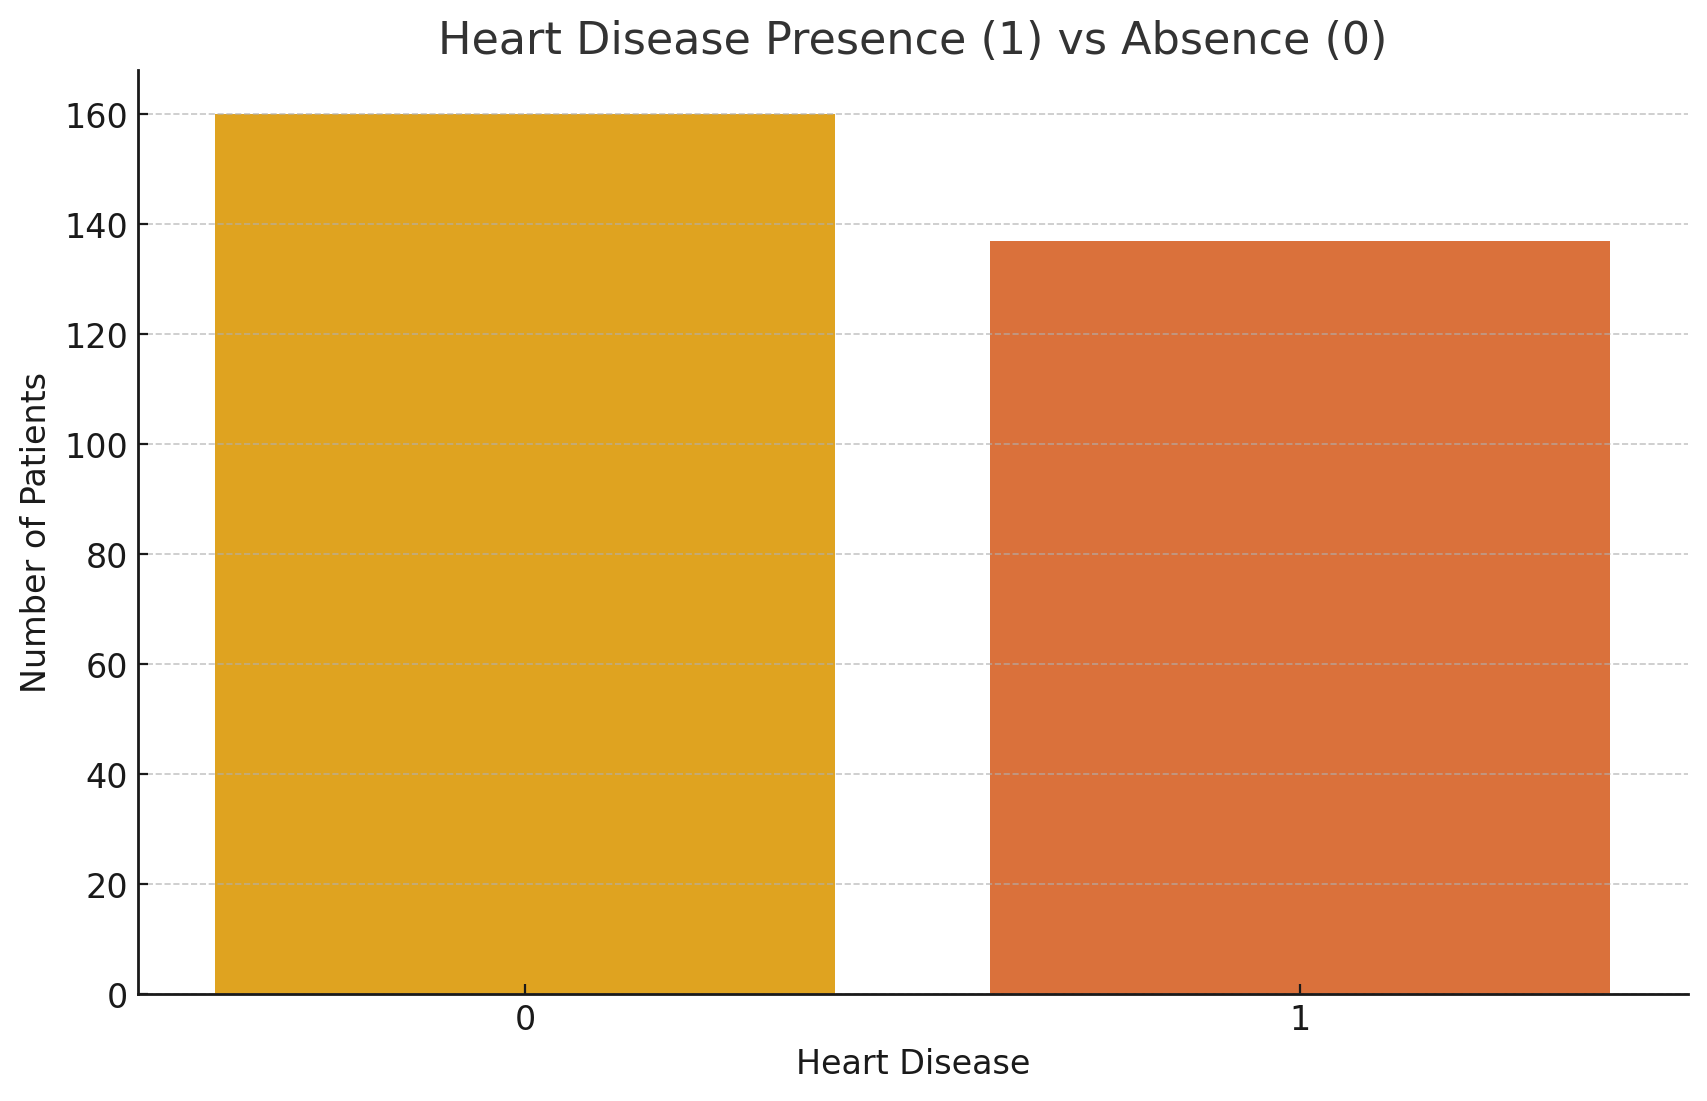

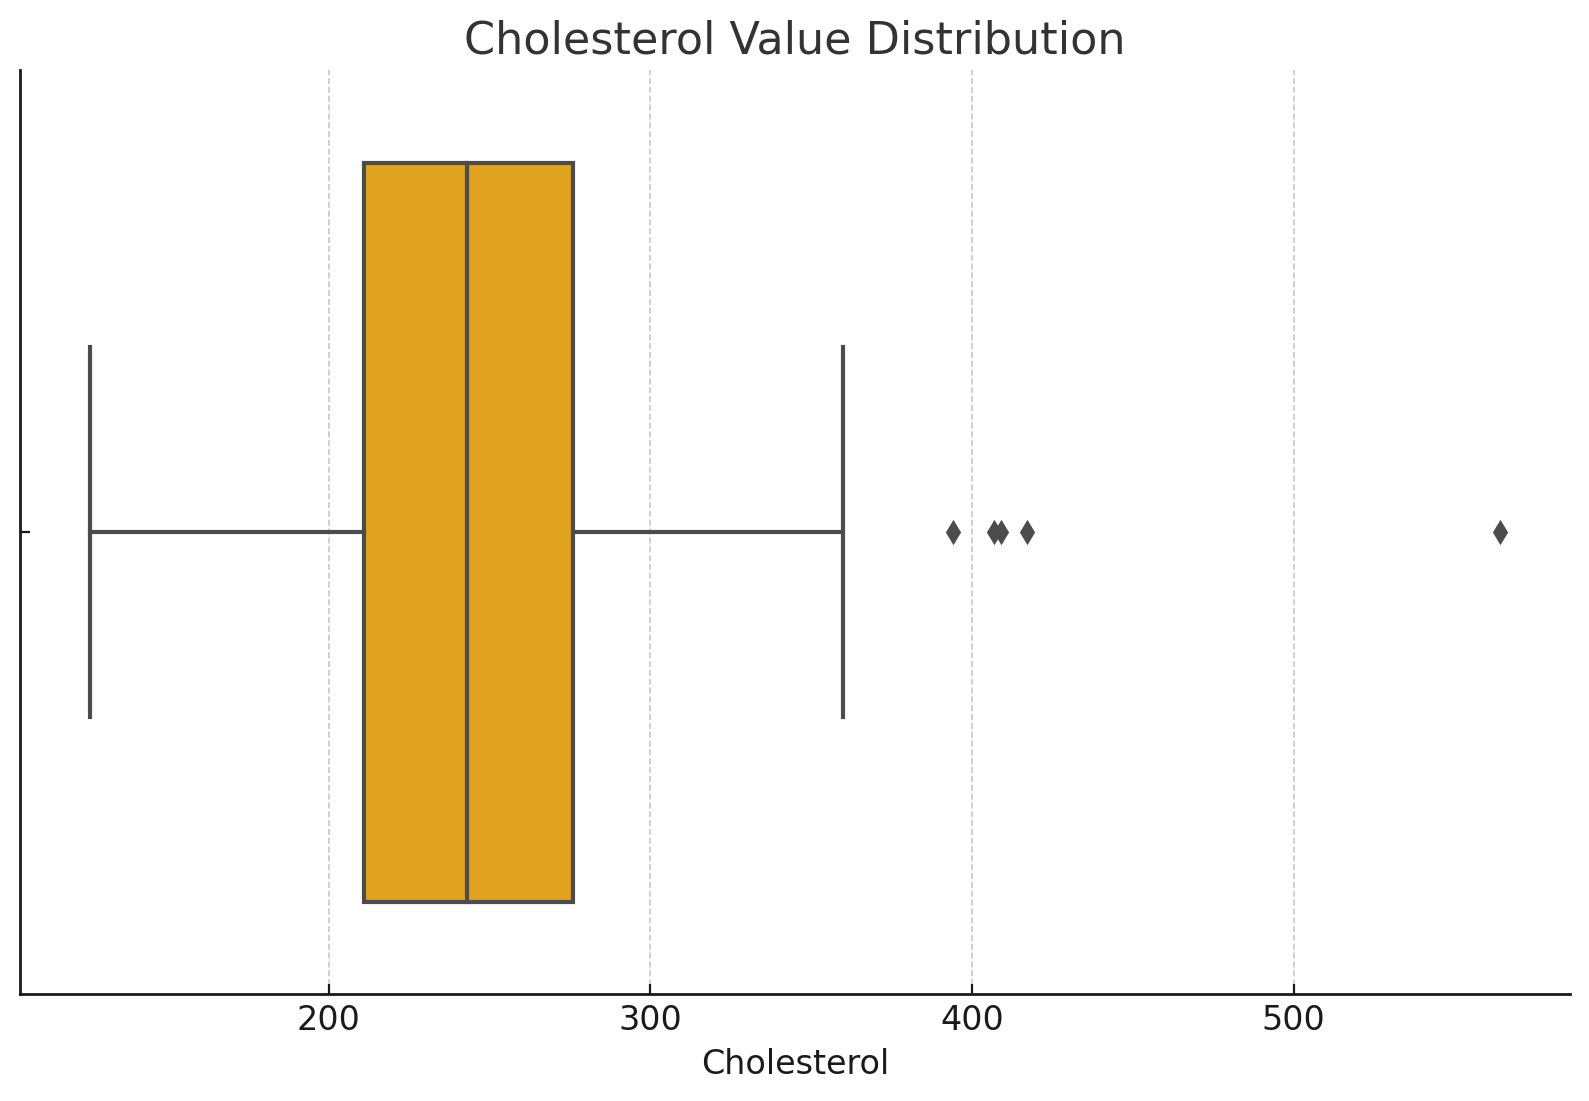

In [ ]:
# STEP 3: Exploratory Data Analysis

# Descriptive statistics
print("Descriptive Statistics for Numerical Variables:")
print(df.describe())

# Unique values in categorical variables
print("\nUnique Values in Each Column:")
print(df.nunique())

# Distribution of target variable
print("\nHeart Disease Outcome Counts:")
print(df['target'].value_counts())

# Bar plot for disease outcome
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.xlabel("Heart Disease")
plt.ylabel("Number of Patients")
plt.show()

# Outlier detection using boxplot for cholesterol
sns.boxplot(x=df['chol'])
plt.title("Cholesterol Value Distribution")
plt.xlabel("Cholesterol")
plt.show()
# 📌 Perform exploratory data analysis (EDA):
# - Use 'describe()' to show summary statistics for numerical columns.
# - Check how many unique values each column has.
# - Count how many people have heart disease and how many do not.
# - Use boxplot to detect outliers in the 'cholesterol' column.

## Step 4: Comparative or Relationship Analysis

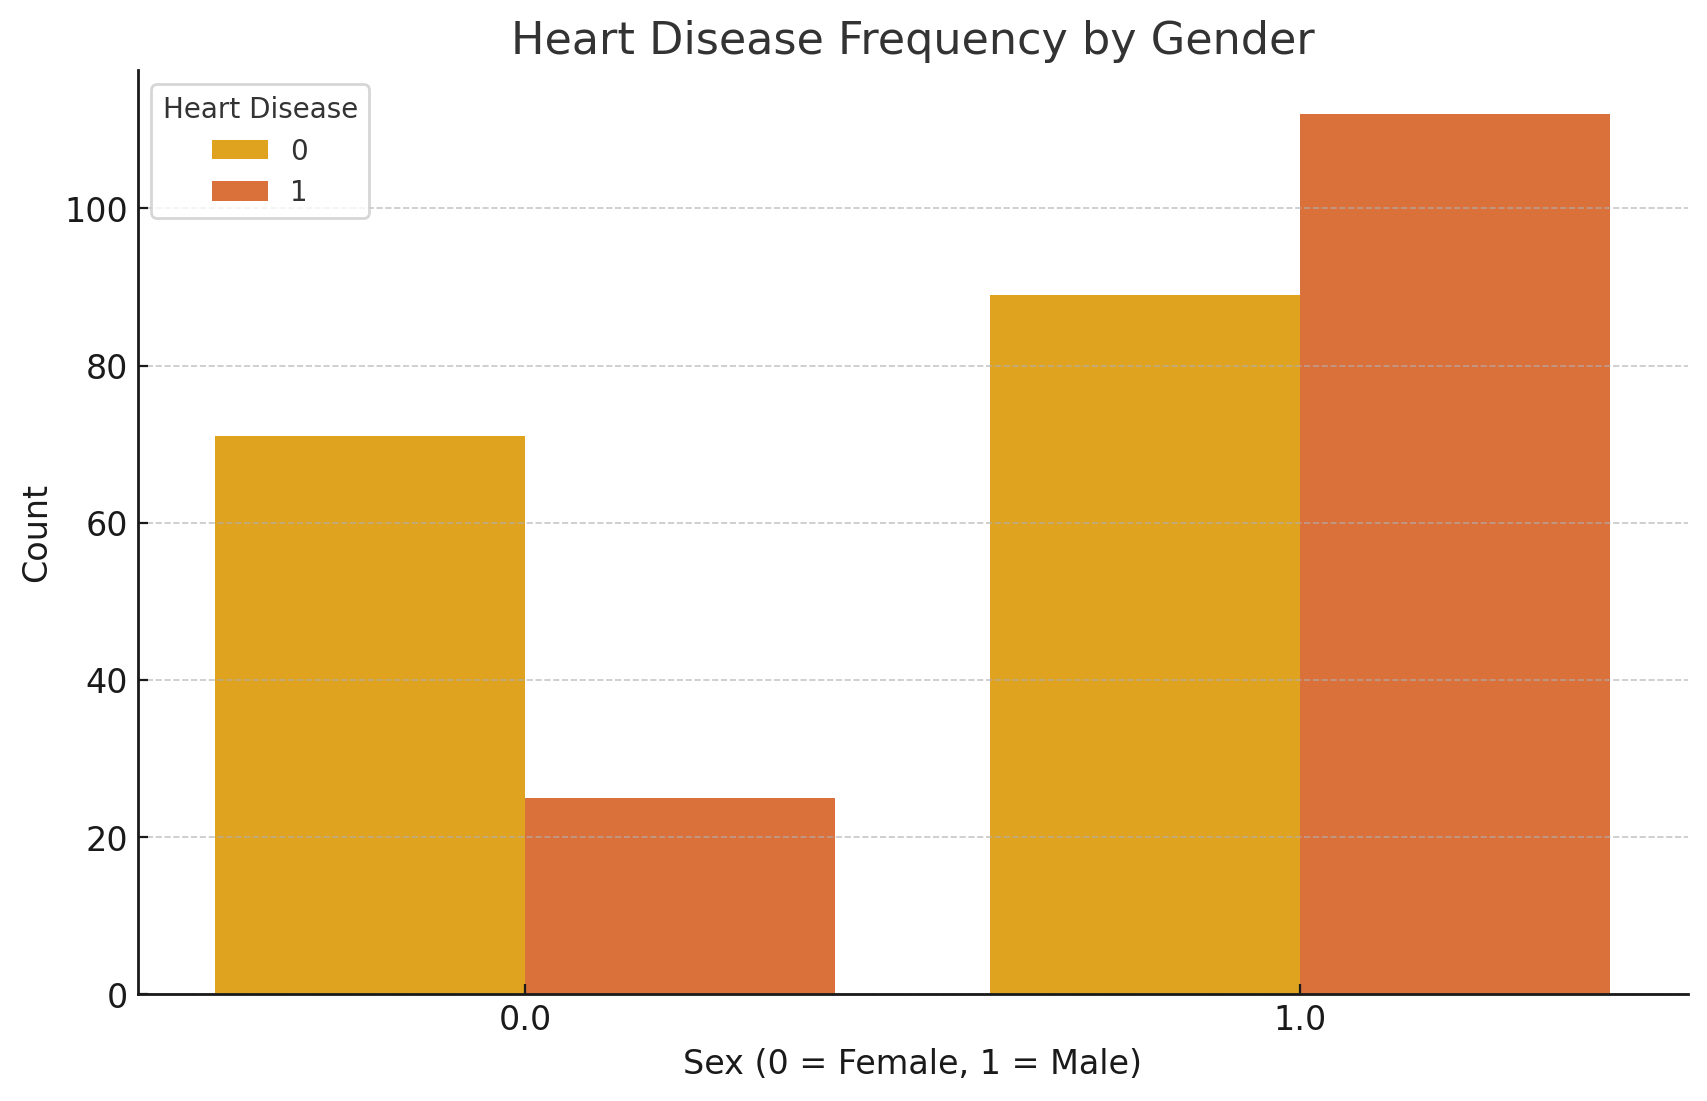

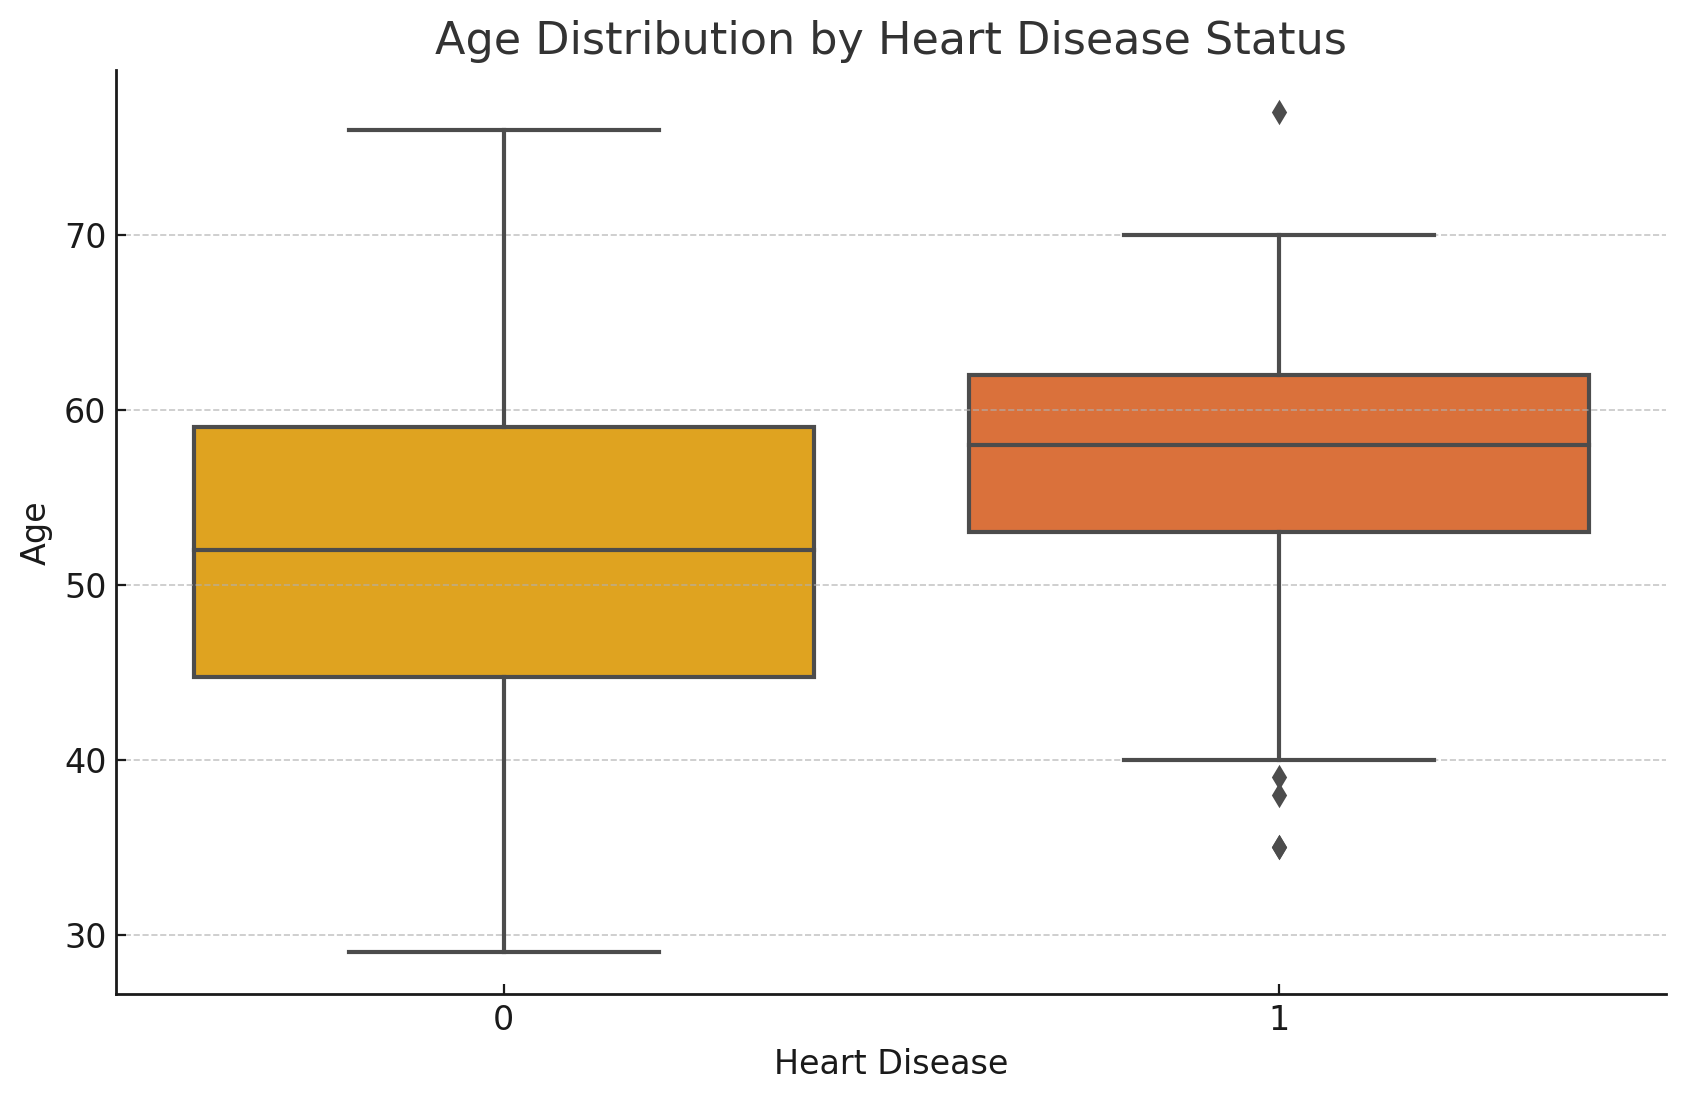

/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


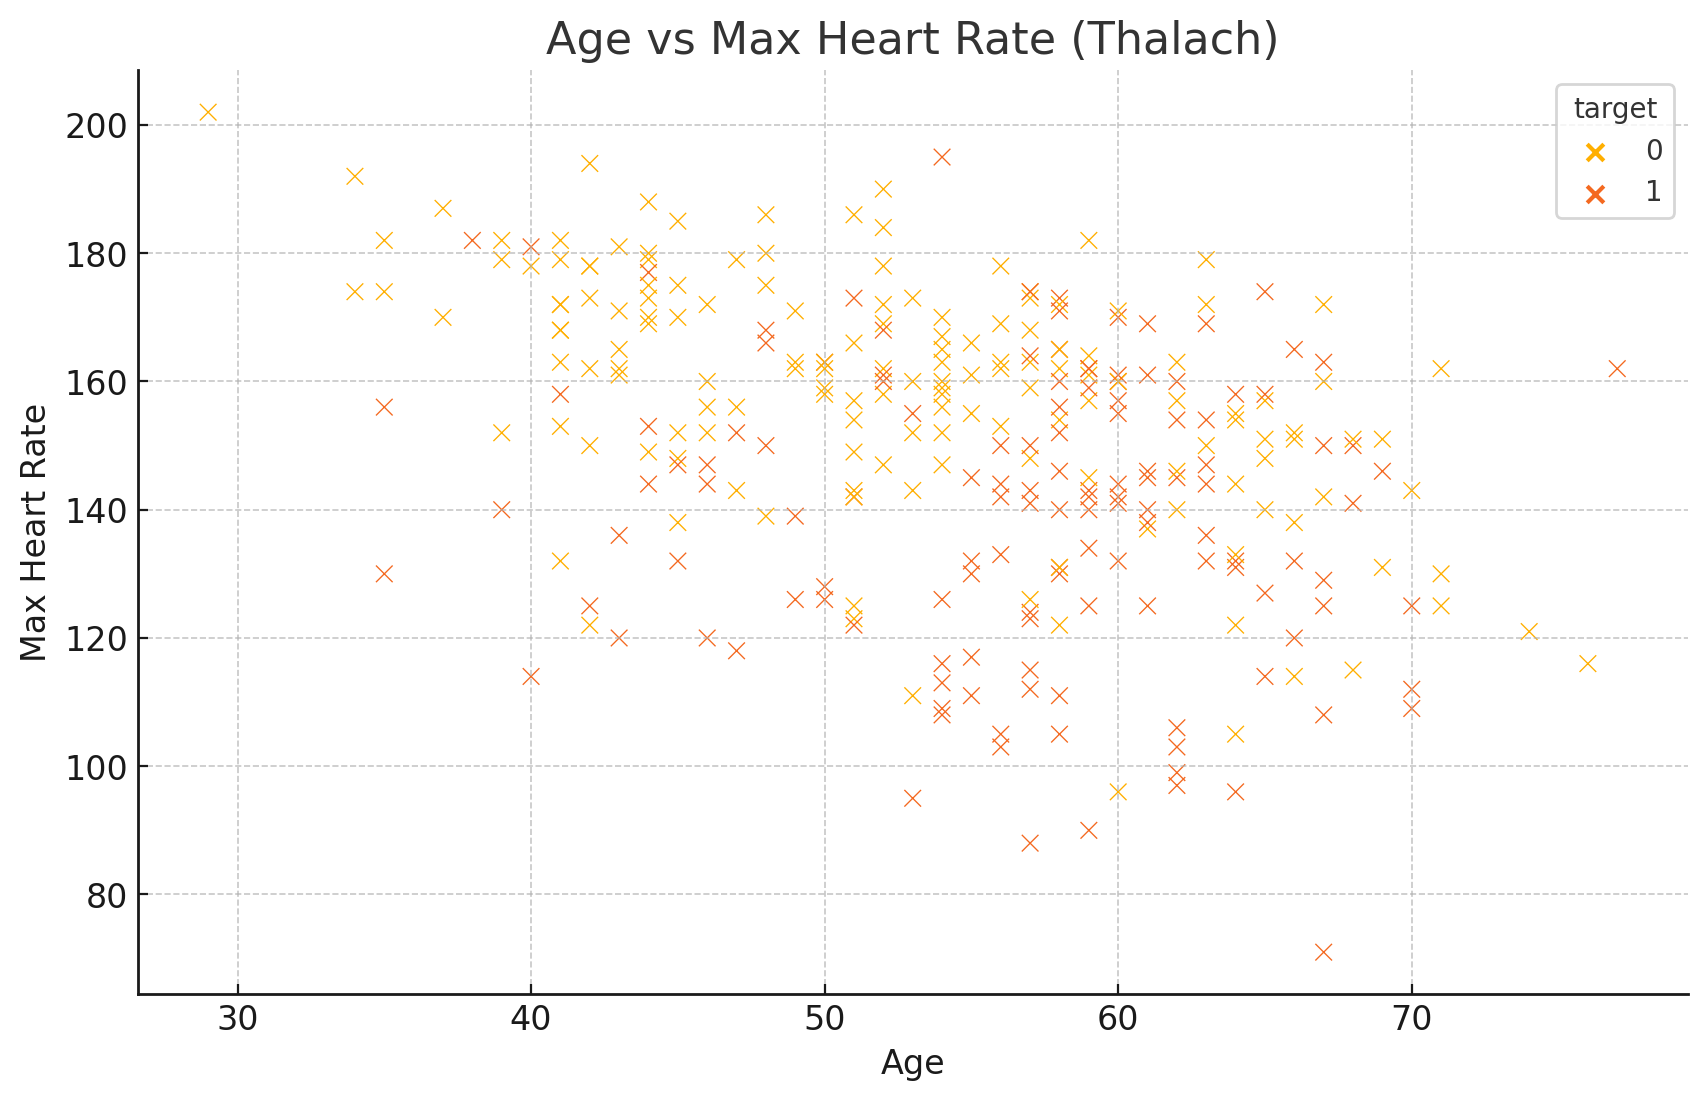

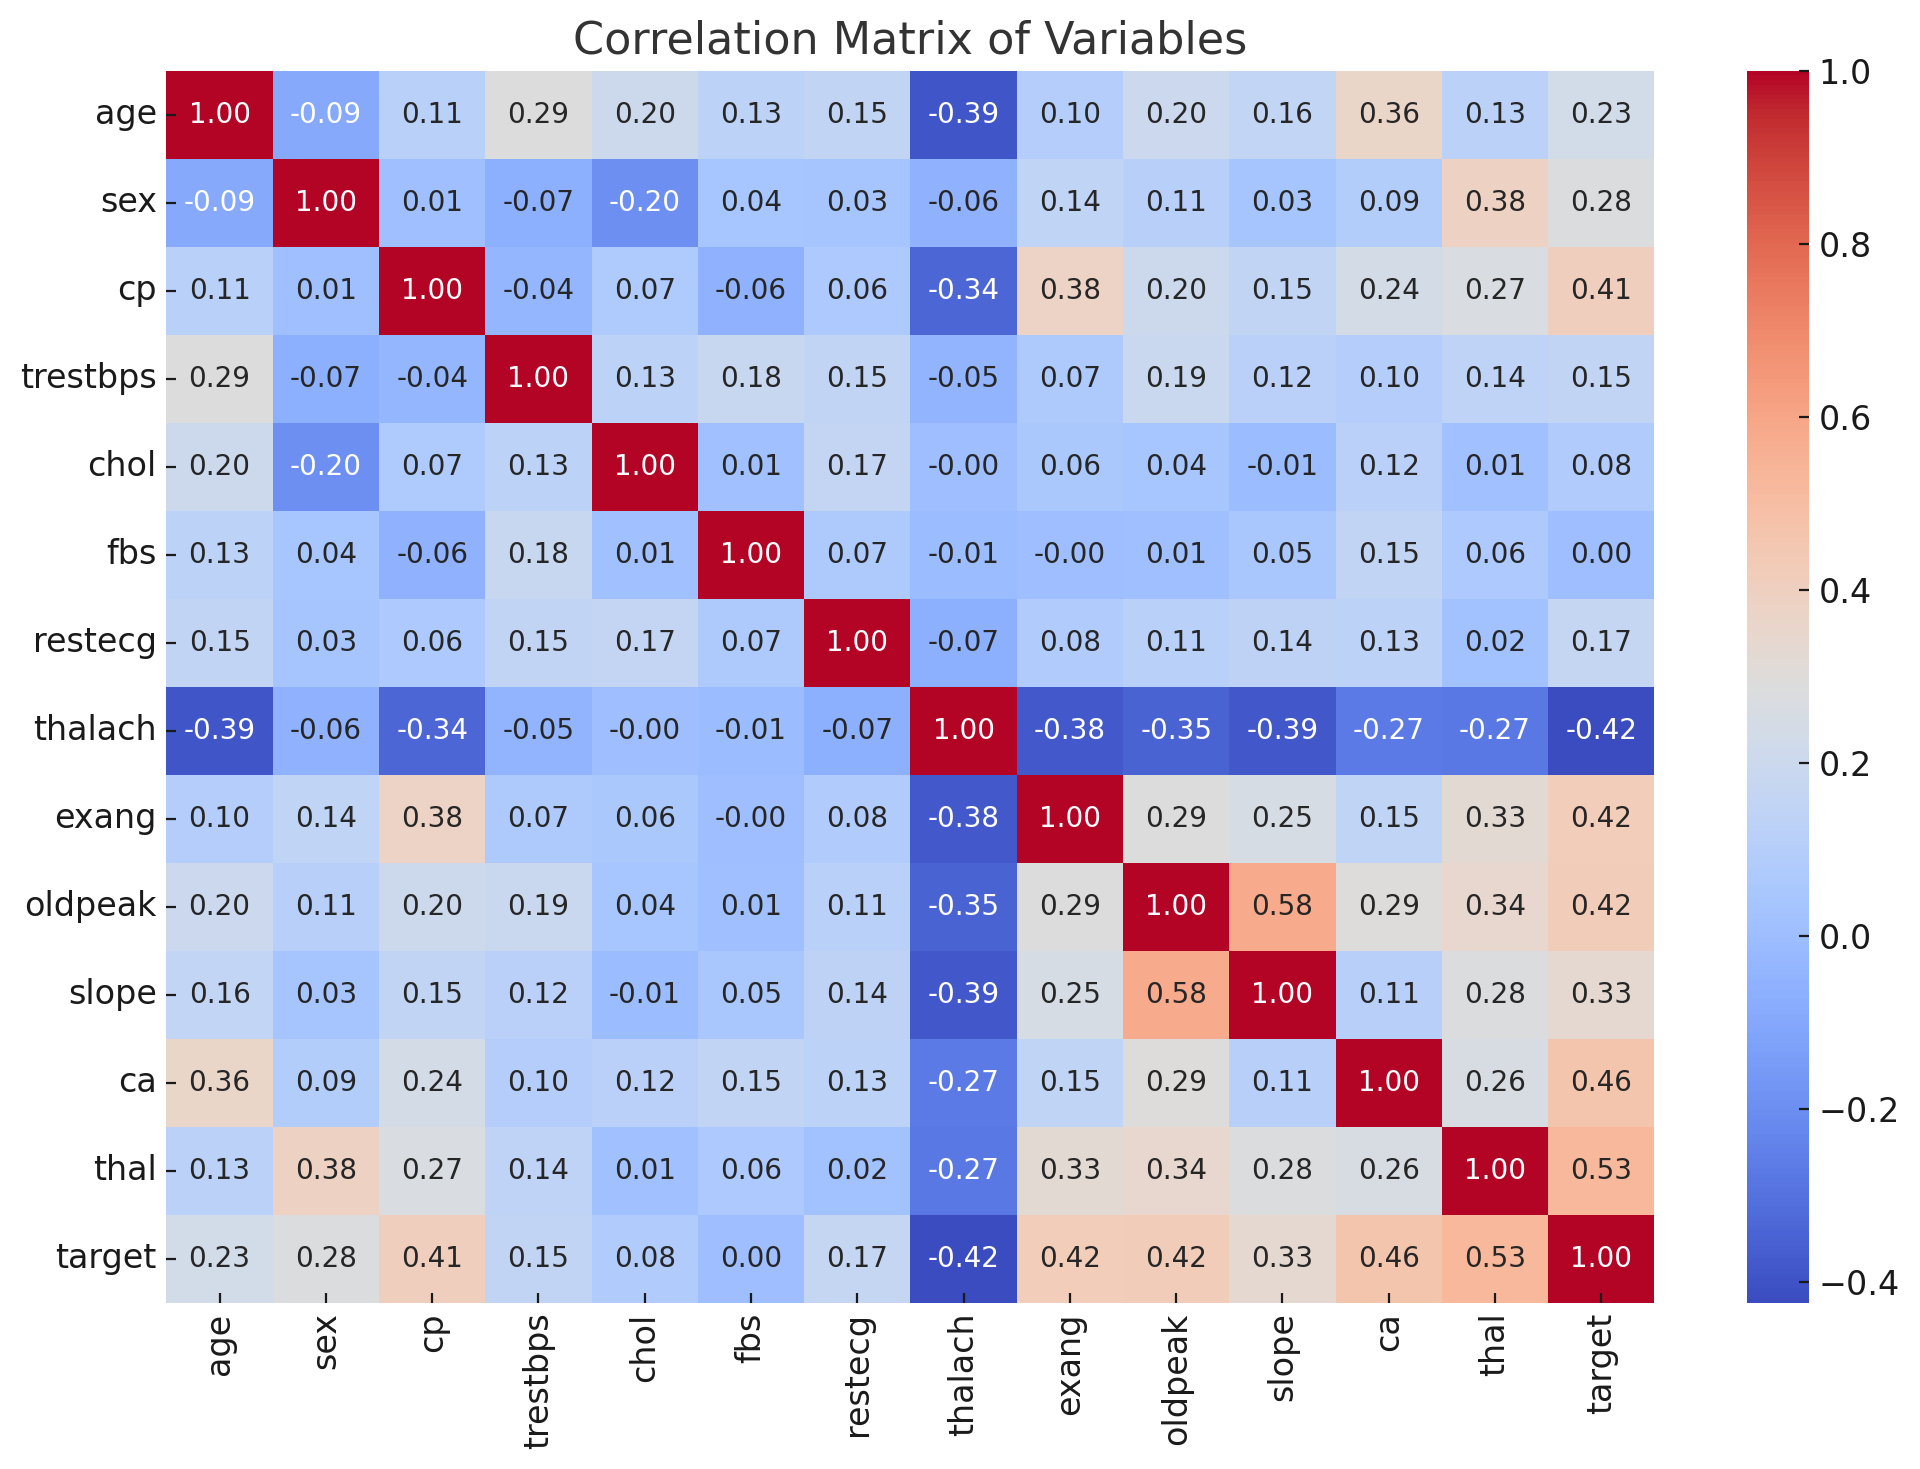

In [ ]:
# STEP 4: Relationship Analysis

# Gender vs Heart Disease
sns.countplot(x='sex', hue='target', data=df)
plt.title("Heart Disease Frequency by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title='Heart Disease')
plt.show()

# Age vs Heart Disease
sns.boxplot(x='target', y='age', data=df)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Heart Disease")
plt.ylabel("Age")
plt.show()

# Age vs Max Heart Rate
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.title("Age vs Max Heart Rate (Thalach)")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()
# 📌 Visualize the relationship between gender and heart disease.
# The bar chart shows how many males and females have or don't have heart disease.


## Step 5: Interpretation and Reflection

### Insights
- Males appear more likely to have heart disease.
- Age and max heart rate show patterns with disease presence.
- Cholesterol distribution shows potential outliers.

### Reflection on Generative AI
ChatGPT was used to assist in writing and debugging code.

### Conclusion
This project improved my skills in data cleaning, visualization, and real-world dataset analysis using Python and pandas.
